In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt


# （一）选择题和判断题
### (1) 神经元节点执行的运算是什么？（选择题 2分）
- a. 先执行 $a=W_1x+b_1$运算, 然后执行$y_2 = W_2 a + b_2$运算。
- b. 先执行非线性运算$a = g(x)$, 然后执行$y = Wa+b$。
- c. 先执行$a = Wx+b$运算，然后执行非线性运算$y=g(a)$。
- d. 先计算$a = g_1(x)$，然后执行非线性运算$y = g_2(a)$

答案： C

### (2) 彩色图片$x$为数组$(3,28,28)$, 把$x$ 转换为一个列向量 （代码设计题 1分）。然后设计sigmoid函数，并把列向量$x$输入sigmoid函数并打印出第6个元素的值（代码设计题 2分）


In [5]:
x = torch.ones(3,28,28)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 设计代码的位置
x=torch.reshape(x,(3*28*28,1))
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
print(x.shape)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 设计代码的位置
def sigmoid(x):
    return 1. / (1 + torch.exp(-x))
A=sigmoid(x)
print(A[6])

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

torch.Size([2352, 1])
tensor([0.7311])


###  (3) 在二分类问题中，神经网络最后输出层的激活函数是什么？(选择题 2分)
- a.tanh 
- b.ReLU
- c.Leaky ReLU
- d.sigmoid

答案： D

### (4) “神经网络后面层处理的特征更加复杂抽象”，该说法是否正确？(判断题 2分)
- a.正确
- b.错误

答案: A

### (5) 下面哪些是超参数？（多选题 3分）
- a. 神经网络的层数
- b. 神经元的线性变换矩阵和偏置
- c. 选定的激活函数
- d. 优化算法的学习率
- e. 交叉熵损失函数
- f. Epoches 次数

答案： ACDF

 神经网路中的超参数主要包括1. 学习率 ηη，2. 正则化参数 λλ，3. 神经网络的层数 LL，4. 每一个隐层中神经元的个数 jj，5. 学习的回合数EpochEpoch，6. 小批量数据 minibatchminibatch 的大小，7. 输出神经元的编码方式，8. 代价函数的选择，9. 权重初始化的方法，10. 神经元激活函数的种类，11.参加训练模型数据的规模 这十一类超参数。

### (6) “在$k$层的前向传播过程中，需要确定$k$层中的激活函数（Sigmoid，tanh，ReLU等）来计算神经元的输出， 在反向传播时，可忽略第$k$层的激活函数，仅计算线性矩阵的梯度”，该说法是否正确？（判断题2分）

- a.正确
- b.错误

答案: B

### （7） 训练好的神经网络模型在哪类测试集上具有更好的泛化能力？（选择题 2分）
- a. 测试集的样本噪声比较小
- b. 测试集的样本与训练集的样本分布相同
- c. 测试集的样本来源与同一分布，但可以与训练集样本的分布具有显著的差异
- d. 泛化能力与测试集的样本无关

答案：  B

### （8）在神经网络模型的偏差-方差现象中，选择可以减少方差或过拟合的策略？(多选题 3分)
- a. $L_1$ 正则化 
- b. 增加训练样本数
- c. 增加神经网络的层数
- d. 把激活函数Sigmoid修改为ReLU
- e. 减少学习率
- f. Dropout

答案：ABF

### (9) 在优化神经网络时，关于mini-batch的正确描述？（选择题 2分）
- a. 在不同的mini-batch下，不需要显式地进行循环，就可以实现mini-batch梯度下降，从而使算法同时处理所有的数据。
- b. 使用mini-batch梯度下降训练的时间（一次训练完整个训练集）比使用梯度下降训练的时间要快。
- c. mini-batch梯度下降（在单个mini-batch上计算）的一次迭代快于梯度下降的迭代。
- d. mini-batch梯度下降算法不会导致损失函数（loss）振荡。

答案： C

### (10) 在训练深度神经网络时，可采用哪些技术来减少训练时间来获得同样的精度？（多选题，3分）
- a. 所有权重初始化为0 
- b. 对权重采用随机初始化
- c. 调整学习率到合适的值
- d. 调整mini-batch的大小
- e. 使用Adam，RMSProp,AdaGrad等自适应算法
- f. 改变损失函数

答： BCDE

### （11）“神经网络所有超参数对训练模型的精度都会产生较大影响，因而每一个超参数均应该设置到最优值”，该说法是否正确？（判断题2分）

- a.正确
- b.错误

答案:B

### （12） 假设你的输入是一个300×300的彩色（RGB）图像，而你没有使用卷积神经网络。 如果第一个隐藏层有100个神经元，每个神经元与输入层进行全连接，那么这个隐藏层有多少个参数（包括偏置参数）？（选择题 2分）
- a. 9,000,001
- b. 9,000,100
- c. 27,000,001
- d. 27,000,100

答案：  D

### (13）假设你的输入是300×300彩色（RGB）图像，并且你使用卷积层和100个过滤器，每个过滤器都是5×5的大小，请问这个隐藏层有多少个参数（包括偏置参数）?（选择题 2分）
- a. 2501
- b. 2600
- c. 7500
- d. 7600

答案：  D

### (14）假设一个32x32x16的输入，使用步幅为2、过滤器大小为2的最大化池操作，请问输出是多少?（选择题 2分）
- a. 15x15x16
- b. 16x16x8
- c. 16x16x16
- d. 32x32x8

答案：C

### (15) “池化（pooling layer）没有参数，因而不影响反向传播的计算”，该说法是否正确？（判断题2分）

- a.正确
- b.错误

答案: B

### （16） 关于卷积神经网络中的参数共享机制，下面哪些说话是正确的？ （多选题，3分）
- a. 它减少了参数的总数，从而减少过拟合。
- b. 它为一项任务学习的参数可直接迁移到不同的任务进行共享（迁移学习）。
- c. 它保证了梯度下降将许多参数设置为零，从而使得连接稀疏。
- e. 它有效地增加了模型的泛化能力
- f. 它使得在整个输入值的多个位置使用特征检测器。

答案：  ABEF

### (17)  卷积神经网络中“稀疏连接”的优势是什么？（选择题 2分）
- a. 正则化导致梯度下降将许多参数设置为零。
- b. 卷积网络中的每一层只连接到另外两层。
- c. 每个过滤器都连接到上一层的每个通道。
- d. 下一层中的每个激活只依赖于前一层的少量激活。

答案：   D

### （18）  在构建深度卷积神经网络时，下面哪些策略是比较有效的？（多选题，3分）
- a. 多个池化层后面跟着的是一个卷积层。
- b. 多个卷积层后面跟着的是一个池化层。
- c. 全连接层（FC）位于最后的几层。
- d. 全连接层（FC）位于开始的几层。

答案： BC

### (19)  循环神经网络中记忆单元的作用是什么？（选择题 2分）
- a. 记忆单元可以增加模型的参数，获得更深的模型。
- b. 记忆单元可保存历史数据信息，提高模型的泛化能力。
- c. 记忆单元可以获得时间序列的前后相关依赖关系。
- d. 记忆单元可有效地解决网络过程中的梯度爆炸问题。

答案： C

### (20)  循环神经网络训练过程中解决梯度爆炸或消失问题的策略？（多择题 3分）
- a. 增加训练数据集。
- b. 网络训练过程中采用梯度截断(Gradient clipping)手段。
- c. 增加网络的深度。
- d. 把网络结构中的基本单元修改为LSTM单元。
- e. 把网络结构中的基本单元修改为GRU单元。

答案：  BDE

## （二）分类案例（依据要求补充代码  23分）
1.数据集描述。
  MNIST数据集由图灵奖获得者Yann LeCun搜集，是一个大型的手写体数字数据库，通常用于训练各种图像处理系统，也被广泛用于机器学习领域的训练和测试。MNIST数据库中的图像集是NIST（National Institute of Standards and Technology）的两个数据库的组合：专用数据库1和特殊数据库3。数据集是有250人手写数字组成，一半是高中生，一半是美国人口普查局。

MNIST数据集共有训练数据60000张图片、测试数据10000图片。每张图像的大小为28*28（像素），每张图像都为灰度图像。

MNIST数据集包含4个文件，train文件是训练数据集，t10k是测试数据集，images文件是图像文件，lables文件是对应的标签文件。

train-images-idx3-ubyte.gz: training set images (9912422 bytes)

train-labels-idx1-ubyte.gz: training set labels (28881 bytes)

t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)

t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)


2.任务描述：利用MNIST数据集中的6万中图片训练一个深度网络，使得训练的模型在测试集上的精度到达95%以上。

3.模型：采用深度卷积神经网络模型。

4.算法：采用Adam优化求解器。


In [3]:
# 超参数配置
epoches = 3  # 迭代次数
batch_size = 64  # mini-batch 数据块的尺寸大小
learning_rate = 0.01  # 梯度下降算法的学习率
batchsz = 15


In [4]:
# 程序设计1 （4分）
# 读入MNIST数据集,并利用torch.utils.data.DataLoader设计训练集和测试集
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 设计代码的位置
from torchvision import datasets, transforms
# Load dataset
# train data
train_dataset = datasets.MNIST(root= './data',download = False,train = True,
                              transform = transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,),(0.3081,)) 
                              ]))


# test data
test_dataset = datasets.MNIST(root= './data',download = False,train = False,
                              transform = transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,),(0.3081,)) 
                              ]))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size =batchsz, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size =batchsz, shuffle = True)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

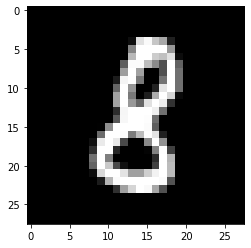

In [5]:
# 绘制单个数据样本
data = iter(train_loader) # 确定数据的索引
(a,b) = next(data) # 获得索引的下一个数据
b = a.numpy() # 转换为numpy格式，方便绘图
#c = b[3,0,...] # 取出一个图片的数据
c = b[0,0,...] 
figure = plt.figure()
plt.imshow(c,cmap = 'gray')
plt.show()

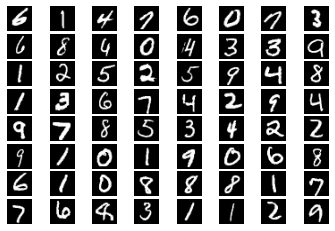

In [25]:
# 绘制多个数据样本
data = iter(train_loader) # 确定数据的索引

figure = plt.figure()
for i in range(64):
    plt.subplot(8,8, i+1)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    (a,b) = next(data) # 获得索引的下一个数据
    b = a.numpy() # 转换为numpy格式，方便绘图
    c = b[0,0,...] # 取出一个图片的数据
    plt.imshow(c,cmap = 'gray')
    plt.axis('off')
plt.show()

In [9]:
# 深度卷积网络模型设计
class Flatten(nn.Module):
    '''
    定义展平运算，为卷积层输出和全连接层的输入进行数据转换
    '''
    def __init__(self):
        super(Flatten,self).__init__()
        
    def forward(self,input):
        return input.view(input.size(0),-1)


class DeepConvolutionNetwork(nn.Module):
    def __init__(self):
        super(DeepConvolutionNetwork,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=10,kernel_size=5,stride=1,padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
        
        # 程序设计2 （5分）
        # 下面设计一个卷积层神经元：
        #    输入通道为10，输出通道为20，卷积核为5x5, 滑动步长为1，边缘填充数为1，
        #    采用窗口宽度为2x2的最大池化操作，激活函数为ReLU,
        #    最后为BatchNorm运算
        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        # 设计代码的位置
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=20,kernel_size=5,stride=1,padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        self.FlattenOperation = Flatten()
        
        self.fc1 = nn.Sequential(
            nn.Linear(500,60),
            nn.Dropout(0.5),
            nn.ReLU()
        )
        
        # 程序设计3 （3分）
        # 下面设计一个线性层神经元：
        #    输出为20，采用Dropout运算，激活函数为ReLU；
        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        # 设计代码的位置
        self.fc2 = nn.Sequential(
            nn.Linear(60,20),
            nn.Dropout(0.5),
            nn.ReLU()
        )
        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        self.fc3 = nn.Linear(20,10)
    
    # 程序设计4 （5分）
    # 设计前向传播模型：模型构成如下：
    #    Conv1(卷积层1)+conv2（卷积层2）+ flatten （展平层）+ fc1（全连接层1） + fc2(全连接层2) + fc3(线性层)
    def forward(self,x):
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # 设计代码的位置
      x= self.conv1(x)  
      x= self.conv2(x)
      x= self.FlattenOperation(x)
      x= self.fc1(x)
      x= self.fc2(x)
      x= self.fc3(x)
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
      return x
        

In [10]:
model = DeepConvolutionNetwork()

# 程序设计5 （2分）
# 设计交叉熵损失函数
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 设计代码的位置
lossfun = nn.CrossEntropyLoss()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# 程序设计6 （2分）
# 设计Adam优化器，采用学习率learning_rate, L2正则的权重衰减系数为0.01)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 设计代码的位置
optimizer = optim.Adam(model.parameters(),lr=learning_rate,betas=(0.9, 0.99))
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

print(model)


DeepConvolutionNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (FlattenOperation): Flatten()
  (fc1): Sequential(
    (0): Linear(in_features=500, out_features=60, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=60, out_features=20, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU()
  )
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)


In [45]:
lossRecord = []
for epoch in range(epoches):
    model.train() 
    for batch_idx, (x,label) in enumerate(train_loader):
        #x,label = x.to(device), label.to(device)
        logits = model(x)
        loss = lossfun(logits,label)
        lossRecord.append(loss.detach().numpy())
        
        
        optimizer.zero_grad()
        # 程序设计7 （2分）
        # 调用后向传播算法，利用Adam优化器进行更新
        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        # 设计代码的位置
        loss.backward()
        optimizer.step()
        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

        if batch_idx % 100 == 0:
            print('Train Epoch:{} [{}/{} {:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx*len(x), len(train_loader.dataset),
                100.*batch_idx/len(train_loader), loss.item() ))
    
    model.eval()
    with torch.no_grad():
        test_correct = 0
        total_num = 0
        for x, label in test_loader:
            #x,label = x.to(device), label.to(device)
            
            logits = model(x)
            pred = logits.argmax(dim =1)
            test_correct += torch.eq(pred,label).float().sum().item()
            total_num += x.size(0)
        
        acc = test_correct / total_num
        print('test epoch',epoch, 'test classification acc:', acc)



Train Epoch:0 [0/60000 0%)]	Loss: 2.378600
Train Epoch:0 [1500/60000 2%)]	Loss: 1.192225
Train Epoch:0 [3000/60000 5%)]	Loss: 1.834092
Train Epoch:0 [4500/60000 8%)]	Loss: 0.808726
Train Epoch:0 [6000/60000 10%)]	Loss: 1.154893
Train Epoch:0 [7500/60000 12%)]	Loss: 1.316797
Train Epoch:0 [9000/60000 15%)]	Loss: 0.859053
Train Epoch:0 [10500/60000 18%)]	Loss: 0.941799
Train Epoch:0 [12000/60000 20%)]	Loss: 0.596275
Train Epoch:0 [13500/60000 22%)]	Loss: 1.786798
Train Epoch:0 [15000/60000 25%)]	Loss: 0.930409
Train Epoch:0 [16500/60000 28%)]	Loss: 1.829315
Train Epoch:0 [18000/60000 30%)]	Loss: 0.727674
Train Epoch:0 [19500/60000 32%)]	Loss: 0.517971
Train Epoch:0 [21000/60000 35%)]	Loss: 0.902616
Train Epoch:0 [22500/60000 38%)]	Loss: 0.310051
Train Epoch:0 [24000/60000 40%)]	Loss: 0.368599
Train Epoch:0 [25500/60000 42%)]	Loss: 0.658182
Train Epoch:0 [27000/60000 45%)]	Loss: 0.639108
Train Epoch:0 [28500/60000 48%)]	Loss: 0.480556
Train Epoch:0 [30000/60000 50%)]	Loss: 0.513975
Train 

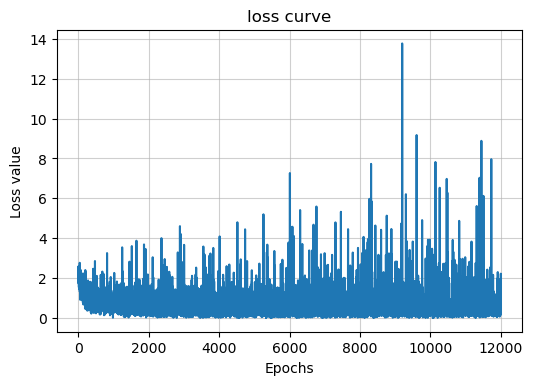

In [46]:
# 绘制损失曲线
figure = plt.figure(figsize = (6,4), dpi=100)
plt.plot(np.arange(len(lossRecord)),lossRecord)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('loss curve')
plt.grid(alpha=0.6)
plt.show()